In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Lab 2 - Thermodynamic assessment of microelectrodes

Notes for the thermal conductivity measurement:
 
1. Use the geometrical details provided for both samples and for the heat-flux sensor

2. Use the heat flux value that actually flows through the sample area, not the average over the sensor’s entire active area.

'Surface_Temperature.xlsx'
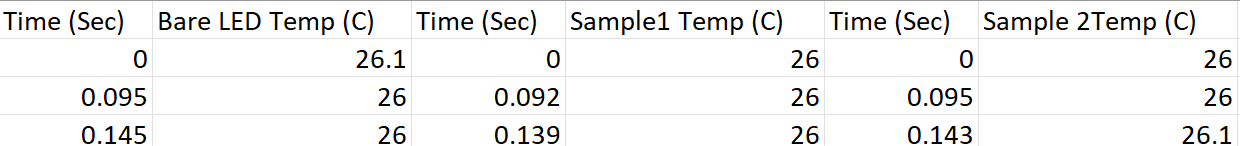

1. Surface Temperature Measurement and Comparison 

- Test two thin film samples. Measure the surface temperature using both an infrared (IR) camera and a thin film thermocouple.
- Prepare a comparison plot of temperature vs. time showing both the heat source temperature and the thin film surface temperature.

In [11]:
surface_temp_df = pd.read_excel('data/Surface_Temperature.xlsx', 
                               sheet_name='Sheet1')

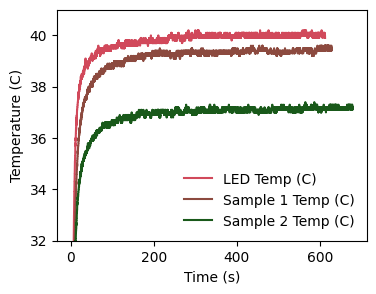

In [15]:
# fall theme colors
fall_red = '#D1495B'
fall_brown = '#8C4A3F'
fall_green = "#19591A"
plt.figure(figsize=(4, 3))
plt.plot(surface_temp_df['Time (Sec)'], surface_temp_df['Bare LED Temp (C)'], label='LED Temp (C)', color=fall_red)
plt.plot(surface_temp_df['Time (Sec).1'], surface_temp_df['Sample1 Temp (C)'], label='Sample 1 Temp (C)', color=fall_brown)
plt.plot(surface_temp_df['Time (Sec).2'], surface_temp_df['Sample 2Temp (C)'], label='Sample 2 Temp (C)', color=fall_green)
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.ylim(32, 41)
plt.legend(frameon=False)

'Thermal Conductivity_measurement.xlsx'
Sample1, Sample2, Geometries

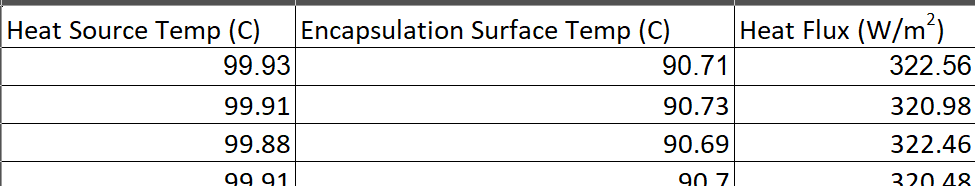

| Samples | Thickness (mm) | width (cm) | Length (cm) |
|---------|-------|------------|-------------|
| Sample 1| 0.25    | 0.3   | 0.9   |
| Sample 2| 0.251    | 0.3      | 0.9|

Heat flux sensor geometry:

Total sensing Area = 6.4516 cm^2

---------------------------------

2. Thermal Conductivity Evaluation

- Measure thermal conductivity of both thin film samples using our customized experimental setup (will be discussed during class).

- Calculate thermal conductivity and compare them. If differences are observed, provide a technical explanation for the discrepancy.

- Clearly state whether the measured conductivity corresponds to in-plane or through-plane behavior.

$k_p = \frac{QH}{A \Delta T} = \rho \times C_p \times D$

In [24]:
conductivity_df_1 = pd.read_excel('data/Thermal Conductivity_measurement.xlsx',
                                    sheet_name='Sample1', 
                            )
conductivity_df_2 = pd.read_excel('data/Thermal Conductivity_measurement.xlsx',
                                    sheet_name='Sample2')
# rename columns for clarity
conductivity_df_1.columns = ['T1', 'T2', 'Q']
conductivity_df_2.columns = ['T1', 'T2', 'Q']
H1 = 0.25e-3 # m
H2 = 0.251e-3 # m
A = 0.3e-2 * 0.9e-2 # m^2

In [34]:
# k_p = flux * thickness / (area * delta T)
conductivity_df_1['k_p'] = conductivity_df_1['Q'] * H1 / (A * (conductivity_df_1['T1'] - conductivity_df_1['T2']))
conductivity_df_2['k_p'] = conductivity_df_2['Q'] * H2 / (A * (conductivity_df_2['T1'] - conductivity_df_2['T2']))
print(f"Sample 1 Kp: {np.mean(conductivity_df_1['k_p']):.2f} W/mK and std: {np.std(conductivity_df_1['k_p']):.2f} W/mK")
print(f"Sample 2 Kp: {np.mean(conductivity_df_2['k_p']):.2f} W/mK and std: {np.std(conductivity_df_2['k_p']):.2f} W/mK")

# plt.figure(figsize=(4, 3))
# x_pos = [0.8, 1.2]  # Closer positions
# sample_names = ['Sample 1', 'Sample 2']

# plt.scatter(x_pos[0], np.mean(conductivity_df_1['k_p']), label='Sample 1', color=fall_brown)
# plt.scatter(x_pos[1], np.mean(conductivity_df_2['k_p']), label='Sample 2', color=fall_green)
# plt.errorbar(x_pos[0], np.mean(conductivity_df_1['k_p']), yerr=np.std(conductivity_df_1['k_p']), fmt='o', color=fall_brown)
# plt.errorbar(x_pos[1], np.mean(conductivity_df_2['k_p']), yerr=np.std(conductivity_df_2['k_p']), fmt='o', color=fall_green)

# plt.xticks(x_pos, sample_names)
# plt.xlim(0.5, 1.5)  # Tight x-axis limits
# plt.ylabel('Thermal Conductivity (W/mK)')
# plt.ylim(0, 1200)

Sample 1 Kp: 298.63 W/mK and std: 11.31 W/mK
Sample 2 Kp: 1073.57 W/mK and std: 34.37 W/mK


Sample 2 was doped

Kind of sucks to read - hella sample and Time (s) cols

3. Thermal Fatigue Analysis
- Apply thermal fatigue loads at varying frequencies (0.5 Hz, 1 Hz, and 2 Hz). Record and compare the surface thermal profiles of both samples under these conditions.
- Prepare a comparison plot and discuss possible reasons for any differences observed. Why is thermal fatigue analysis important and what are the factors/conditions that alter thermal profiles under fatigue?

In [35]:
tf_df_1 = pd.read_excel('data/Thermal Fatigue.xlsx', sheet_name='Sample1')
tf_df_2 = pd.read_excel('data/Thermal Fatigue.xlsx', sheet_name='Sample2')

-----------------

4. Calibration and Alternative Methods

- Suggest a procedure to calibrate IR camera for accurate surface temperature measurements.

- Propose other thermal conductivity measurement techniques that are simple and cost-effective.